In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23876


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23871,2021-06-02,47,沖縄県,297,17564,1,152
23872,2021-06-03,47,沖縄県,244,17808,1,153
23873,2021-06-04,47,沖縄県,247,18055,0,153
23874,2021-06-05,47,沖縄県,261,18316,0,153
23875,2021-06-06,47,沖縄県,183,18499,0,153


In [3]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [4]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,11176,8639,139
43,香川県,18796,2036,26
44,高知県,19812,1600,21
45,鳥取県,15748,466,2
46,鹿児島県,23368,3497,31


## 都道府県ごとの最新データを付与

In [5]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23869,2021-05-31,47,沖縄県,142,17044,2,150,1859.0
23870,2021-06-01,47,沖縄県,223,17267,1,151,1826.0
23871,2021-06-02,47,沖縄県,297,17564,1,152,1821.0
23872,2021-06-03,47,沖縄県,244,17808,1,153,1825.0
23873,2021-06-04,47,沖縄県,247,18055,0,153,1759.0
23874,2021-06-05,47,沖縄県,261,18316,0,153,1685.0
23875,2021-06-06,47,沖縄県,183,18499,0,153,1597.0


### 感染者数前日比

In [6]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref["新規感染者数先週比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change(periods=7)

pref.tail(10)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
23866,2021-05-28,47,沖縄県,313,16296,0,148,1602.0,0.304167,0.171147,0.512077
23867,2021-05-29,47,沖縄県,335,16631,0,148,1706.0,0.070288,0.164625,0.450216
23868,2021-05-30,47,沖縄県,271,16902,0,148,1821.0,-0.191045,0.183715,0.737179
23869,2021-05-31,47,沖縄県,142,17044,2,150,1859.0,-0.476015,0.163332,0.365385
23870,2021-06-01,47,沖縄県,223,17267,1,151,1826.0,0.570423,0.036030,-0.128906
23871,2021-06-02,47,沖縄県,297,17564,1,152,1821.0,0.331839,0.057765,-0.016556
23872,2021-06-03,47,沖縄県,244,17808,1,153,1825.0,-0.178451,0.061601,0.016667
23873,2021-06-04,47,沖縄県,247,18055,0,153,1759.0,0.012295,0.019905,-0.210863
23874,2021-06-05,47,沖縄県,261,18316,0,153,1685.0,0.056680,0.017961,-0.220896
23875,2021-06-06,47,沖縄県,183,18499,0,153,1597.0,-0.298851,0.002560,-0.324723


In [7]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均","新規感染者数先週比"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
507,北海道,1812.0,-0.336957,-0.032448,-0.364583
1015,青森県,76.0,-0.777778,1.324749,1.000000
1523,岩手県,66.0,0.333333,0.218687,0.333333
2031,宮城県,125.0,-0.266667,0.440476,0.100000
2539,秋田県,5.0,NaN,NaN,NaN


In [8]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
0,三重県,12192,5046,107,155.0,-0.434783,-0.030912,-0.315789
1,京都府,13208,16102,221,302.0,-0.061224,0.059001,-0.333333
2,佐賀県,20828,2528,21,28.0,-1.000000,-0.014966,-1.000000
3,兵庫県,14224,40203,1220,529.0,-0.283951,0.231599,-0.420000
4,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583


## 人口データを付与

In [9]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [10]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口
0,三重県,12192,5046,107,155.0,-0.434783,-0.030912,-0.315789,1813859
1,京都府,13208,16102,221,302.0,-0.061224,0.059001,-0.333333,2545899
2,佐賀県,20828,2528,21,28.0,-1.000000,-0.014966,-1.000000,823810
3,兵庫県,14224,40203,1220,529.0,-0.283951,0.231599,-0.420000,5549568
4,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583,5267762


## 人口当たりの感染者数

In [11]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583,5267762,74.969218,749.692184,34.397909
41,青森県,1016,2417,30,76.0,-0.777778,1.324749,1.000000,1275783,18.945228,189.452281,5.957126
19,岩手県,1524,1502,46,66.0,0.333333,0.218687,0.333333,1235517,12.156854,121.568542,5.341893
11,宮城県,2032,8975,83,125.0,-0.266667,0.440476,0.100000,2292385,39.151364,391.513642,5.452836
36,秋田県,2540,760,16,5.0,NaN,NaN,NaN,985416,7.712479,77.124788,0.507400
15,山形県,3048,1998,45,42.0,0.142857,0.116497,0.000000,1082296,18.460754,184.607538,3.880639
35,福島県,3556,4643,153,73.0,0.222222,0.174446,0.000000,1881981,24.670812,246.708123,3.878891
38,茨城県,4064,9925,153,207.0,0.259259,0.162513,0.214286,2921436,33.973019,339.730187,7.085557
27,栃木県,4572,6488,78,159.0,-0.480000,0.044218,-0.500000,1965516,33.009144,330.091437,8.089479
37,群馬県,5080,7917,144,105.0,-0.500000,-0.041331,-0.736842,1969439,40.199265,401.992649,5.331467


## 感染者数

### 平均値、中央値

In [12]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      16156.382979
std       29615.963559
min         466.000000
25%        2472.500000
50%        4875.000000
75%       10468.500000
max      163680.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [13]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6604,163680,2108,2985.0,-0.194954,0.018128,-0.216518,13834925,118.309279,1183.092789,21.575831
1,大阪府,13716,100865,2417,1246.0,-0.166667,0.037067,-0.263959,8849635,113.976452,1139.764521,14.079677
2,神奈川県,7112,62814,910,1438.0,0.111607,0.036429,0.068670,9209442,68.206087,682.060868,15.614410
3,愛知県,11684,48822,843,1678.0,-0.224771,0.005959,-0.445902,7575530,64.446976,644.469760,22.150265
4,埼玉県,5588,44444,801,737.0,-0.319328,0.002316,-0.336066,7390054,60.140291,601.402913,9.972864
5,兵庫県,14224,40203,1220,529.0,-0.283951,0.231599,-0.420000,5549568,72.443477,724.434767,9.532274
6,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583,5267762,74.969218,749.692184,34.397909
7,千葉県,6096,37735,690,693.0,-0.445255,0.030257,-0.182796,6319772,59.709433,597.094326,10.965585
8,福岡県,20320,34643,479,606.0,-0.070588,-0.033698,-0.480263,5129841,67.532308,675.323075,11.813232
9,沖縄県,23876,18499,153,1597.0,-0.298851,0.002560,-0.324723,1481547,124.862728,1248.627279,107.792733


## １万人あたりの感染者数

### 平均値、中央値

In [14]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      38.882358
std       27.893942
min        7.712479
25%       21.100238
50%       29.872423
75%       51.080450
max      124.862728
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [15]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23876,18499,153,1597.0,-0.298851,0.002560,-0.324723,1481547,124.862728,1248.627279,107.792733
4,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583,5267762,74.969218,749.692184,34.397909
24,愛知県,11684,48822,843,1678.0,-0.224771,0.005959,-0.445902,7575530,64.446976,644.469760,22.150265
26,東京都,6604,163680,2108,2985.0,-0.194954,0.018128,-0.216518,13834925,118.309279,1183.092789,21.575831
44,高知県,19812,1600,21,152.0,0.473684,0.057339,0.120000,709230,22.559677,225.596774,21.431694
17,岐阜県,10668,8928,168,356.0,-0.488372,-0.040535,-0.592593,2032490,43.926415,439.264154,17.515461
32,神奈川県,7112,62814,910,1438.0,0.111607,0.036429,0.068670,9209442,68.206087,682.060868,15.614410
16,山梨県,9652,1672,19,129.0,-0.404255,0.435957,4.600000,826579,20.227952,202.279516,15.606494
29,滋賀県,12700,5296,82,220.0,-0.558824,-0.090278,-0.615385,1420948,37.270892,372.708924,15.482621
9,大阪府,13716,100865,2417,1246.0,-0.166667,0.037067,-0.263959,8849635,113.976452,1139.764521,14.079677


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [16]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    40.000000
mean      0.117846
std       0.245405
min      -0.090278
25%      -0.012226
50%       0.040642
75%       0.132306
max       1.324749
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
41,青森県,1016,2417,30,76.0,-0.777778,1.324749,1.000000,1275783,18.945228,189.452281,5.957126
39,長崎県,21336,2994,68,105.0,-0.482759,0.518622,0.153846,1350769,22.165152,221.651519,7.773350
23,愛媛県,19304,2726,74,14.0,-1.000000,0.442857,-1.000000,1369131,19.910440,199.104395,1.022546
11,宮城県,2032,8975,83,125.0,-0.266667,0.440476,0.100000,2292385,39.151364,391.513642,5.452836
16,山梨県,9652,1672,19,129.0,-0.404255,0.435957,4.600000,826579,20.227952,202.279516,15.606494
3,兵庫県,14224,40203,1220,529.0,-0.283951,0.231599,-0.420000,5549568,72.443477,724.434767,9.532274
19,岩手県,1524,1502,46,66.0,0.333333,0.218687,0.333333,1235517,12.156854,121.568542,5.341893
43,香川県,18796,2036,26,40.0,-0.333333,0.190703,-0.200000,981280,20.748410,207.484102,4.076308
35,福島県,3556,4643,153,73.0,0.222222,0.174446,0.000000,1881981,24.670812,246.708123,3.878891
38,茨城県,4064,9925,153,207.0,0.259259,0.162513,0.214286,2921436,33.973019,339.730187,7.085557


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [18]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
29,滋賀県,12700,5296,82,220.0,-0.558824,-0.090278,-0.615385,1420948,37.270892,372.708924,15.482621
21,広島県,17272,11012,145,389.0,-0.148936,-0.074715,-0.493671,2826858,38.954910,389.549104,13.760861
37,群馬県,5080,7917,144,105.0,-0.500000,-0.041331,-0.736842,1969439,40.199265,401.992649,5.331467
17,岐阜県,10668,8928,168,356.0,-0.488372,-0.040535,-0.592593,2032490,43.926415,439.264154,17.515461
34,福岡県,20320,34643,479,606.0,-0.070588,-0.033698,-0.480263,5129841,67.532308,675.323075,11.813232
4,北海道,508,39492,1191,1812.0,-0.336957,-0.032448,-0.364583,5267762,74.969218,749.692184,34.397909
0,三重県,12192,5046,107,155.0,-0.434783,-0.030912,-0.315789,1813859,27.819141,278.191414,8.545317
18,岡山県,16764,7476,111,157.0,-0.400000,-0.030839,-0.555556,1903627,39.272399,392.723995,8.247414
14,山口県,17780,2994,67,84.0,-0.700000,-0.026685,-0.625000,1369882,21.855897,218.558971,6.131915
2,佐賀県,20828,2528,21,28.0,-1.000000,-0.014966,-1.000000,823810,30.686687,306.866875,3.398842


## グラフ化

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [20]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

In [28]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.text(0,49,"※新型コロナ関連の情報提供:NHK ※人口の情報提供:e-Stat ※{}時点".format(latest_date),fontsize=7)
plt.title("各地の新規感染者数累計",y=0.95)
#plt.xticks(rotation="70",fontsize=9)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
#plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")
#plt.title("各地の感染者数", y=0.9)
#plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.title("1万人当たりの新規感染者数累計", y=0.95)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])
#plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.95)
# plt.text(0,chart_data["都道府県名"][-1],"{}時点".format(latest_date))
#plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(2,2,4) # (rows, columns, panel number)
plt.title("新規感染者数前週同曜日比",y=0.95)
chart_data = all_jp.sort_values("新規感染者数先週比",na_position="first")
#chart_data = all_jp.sort_values("直近1週間の新規感染者数前日比平均",na_position="first")

plt.yticks(fontsize=8)
plt.grid(axis="x")
plt.barh(chart_data["都道府県名"], chart_data["新規感染者数先週比"])
#plt.text(chart_data["直近1週間の新規感染者数前日比平均"].max(),-1,"※{}時点".format(latest_date),fontsize=9,ha="right")

#fig.text(0,0,"※{}時点".format(latest_date),fontsize=9)

fig.tight_layout()


<IPython.core.display.Javascript object>

In [22]:
fig.savefig("out/covid-domestic.png")

## 度数分布表

In [23]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   466.    20867.75  41269.5   61671.25  82073.   102474.75 122876.5
 143278.25 163680.  ]


## ヒストグラム

<IPython.core.display.Javascript object>


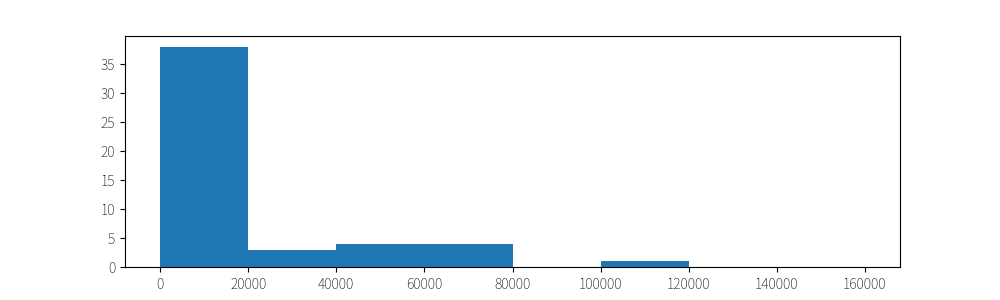

(array([38.,  3.,  4.,  0.,  1.,  0.,  0.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [24]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


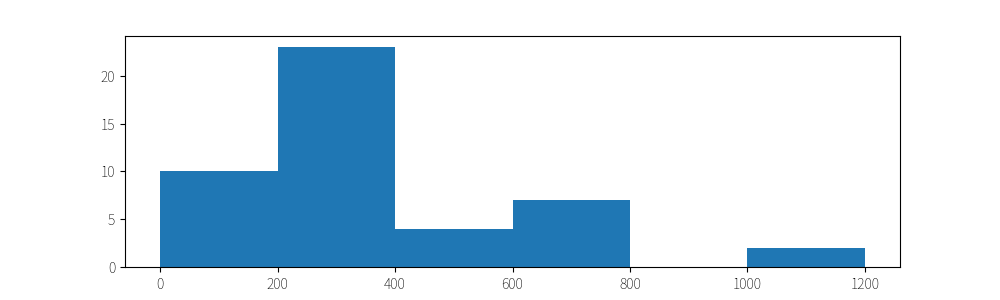

(array([10., 23.,  4.,  7.,  0.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [25]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])


In [27]:
pref[pref["都道府県名"]=="徳島県"].tail(10)


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,新規感染者数先週比
18278,2021-05-28,36,徳島県,1,1628,0,61,22.0,-0.5,-0.083673,-0.857143
18279,2021-05-29,36,徳島県,2,1630,0,61,17.0,1.0,0.059184,-0.714286
18280,2021-05-30,36,徳島県,1,1631,0,61,13.0,-0.5,0.028571,-0.800000
18281,2021-05-31,36,徳島県,0,1631,0,61,8.0,-1.0,-0.114286,-1.000000
18282,2021-06-01,36,徳島県,0,1631,0,61,7.0,NaN,NaN,-1.000000
18283,2021-06-02,36,徳島県,1,1632,0,61,7.0,inf,NaN,0.000000
18284,2021-06-03,36,徳島県,0,1632,1,62,5.0,-1.0,NaN,-1.000000
18285,2021-06-04,36,徳島県,1,1633,0,62,5.0,inf,NaN,0.000000
18286,2021-06-05,36,徳島県,3,1636,1,63,6.0,2.0,NaN,0.500000
18287,2021-06-06,36,徳島県,0,1636,0,63,5.0,-1.0,NaN,-1.000000
